In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA):
* Perform in-depth EDA to understand the dataset characteristics.
* Calculate summary statistics for numerical columns.
* Analyze categorical data distributions.
* Visualize relationships between features and the target variable (churn).
* Identify potential correlations and patterns.

In [2]:
# Load the dataset
df = pd.read_csv('synthetic_customer_data.csv')
df.head()

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,AverageMonthlyCharges,CustomerLifetimeValue
0,1,44,Female,Month-to-month,120.769391,5678.486949,No,Fiber optic,47,No,Mailed check,No,120.818871,5676.161357
1,2,38,Male,Month-to-month,62.208365,4265.407596,No,Fiber optic,69,No,Bank transfer,No,61.817501,4292.377176
2,3,46,Female,Two year,71.061143,1626.640349,Yes,DSL,24,Yes,Credit card,No,67.776681,1705.467420
3,4,55,Female,Month-to-month,37.398676,2639.984014,No,DSL,71,Yes,Mailed check,No,37.182873,2655.305972
4,5,37,Female,Month-to-month,46.861917,1541.051431,Yes,Fiber optic,34,Yes,Electronic check,No,45.325042,1593.305195


In [3]:
# Summary statistics for numerical columns
df.describe()

,CustomerID,Age,MonthlyCharges,TotalCharges,Tenure,AverageMonthlyCharges,CustomerLifetimeValue
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,39.607400,71.329678,2595.760558,36.305800,71.134515,2588.058975
std,1443.520003,9.814893,29.716290,1926.983731,20.765494,29.384160,1905.103843
min,1.000000,18.000000,20.000000,20.000000,1.000000,2.857143,20.000000
25%,1250.750000,33.000000,50.262598,1056.797826,18.000000,49.954128,1050.306164
50%,2500.500000,40.000000,70.537033,2182.721111,36.000000,70.585700,2173.921024
75%,3750.250000,46.000000,90.813449,3801.057208,54.000000,91.072851,3783.791094
max,5000.000000,79.000000,438.878151,18123.069924,72.000000,198.722915,10350.000000


In [4]:
# Summary statistics categorical columns
df.describe(include='object')

,Gender,ContractType,TechSupport,InternetService,PaperlessBilling,PaymentMethod,Churn
count,5000,5000,5000,5000,5000,5000,5000
unique,2,3,2,3,2,4,2
top,Male,Month-to-month,No,Fiber optic,Yes,Mailed check,No
freq,2559,3019,2574,2515,2566,1304,4030


In [5]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.806
Yes    0.194
Name: proportion, dtype: float64

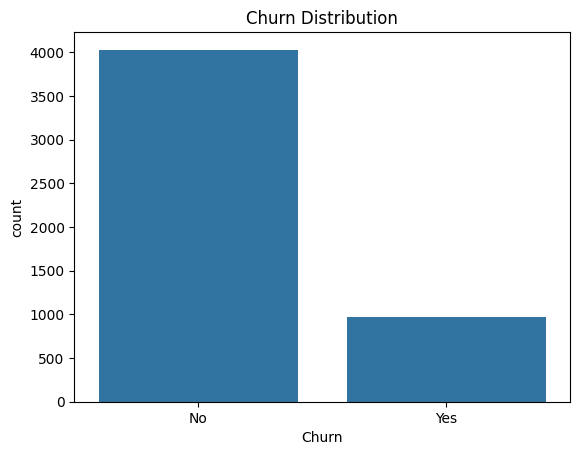

In [6]:

# Visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


/var/folders/k4/xdmyf71j29v6ddmj8l6b5lf80000gn/T/ipykernel_1461/1846686245.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
/var/folders/k4/xdmyf71j29v6ddmj8l6b5lf80000gn/T/ipykernel_1461/1846686245.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
/var/folders/k4/xdmyf71j29v6ddmj8l6b5lf80000gn/T/ipykernel_1461/1846686245.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
/var/folders/k4/xdmyf71j29v6ddmj8l6b5lf80000gn/T/ipykernel_1461/

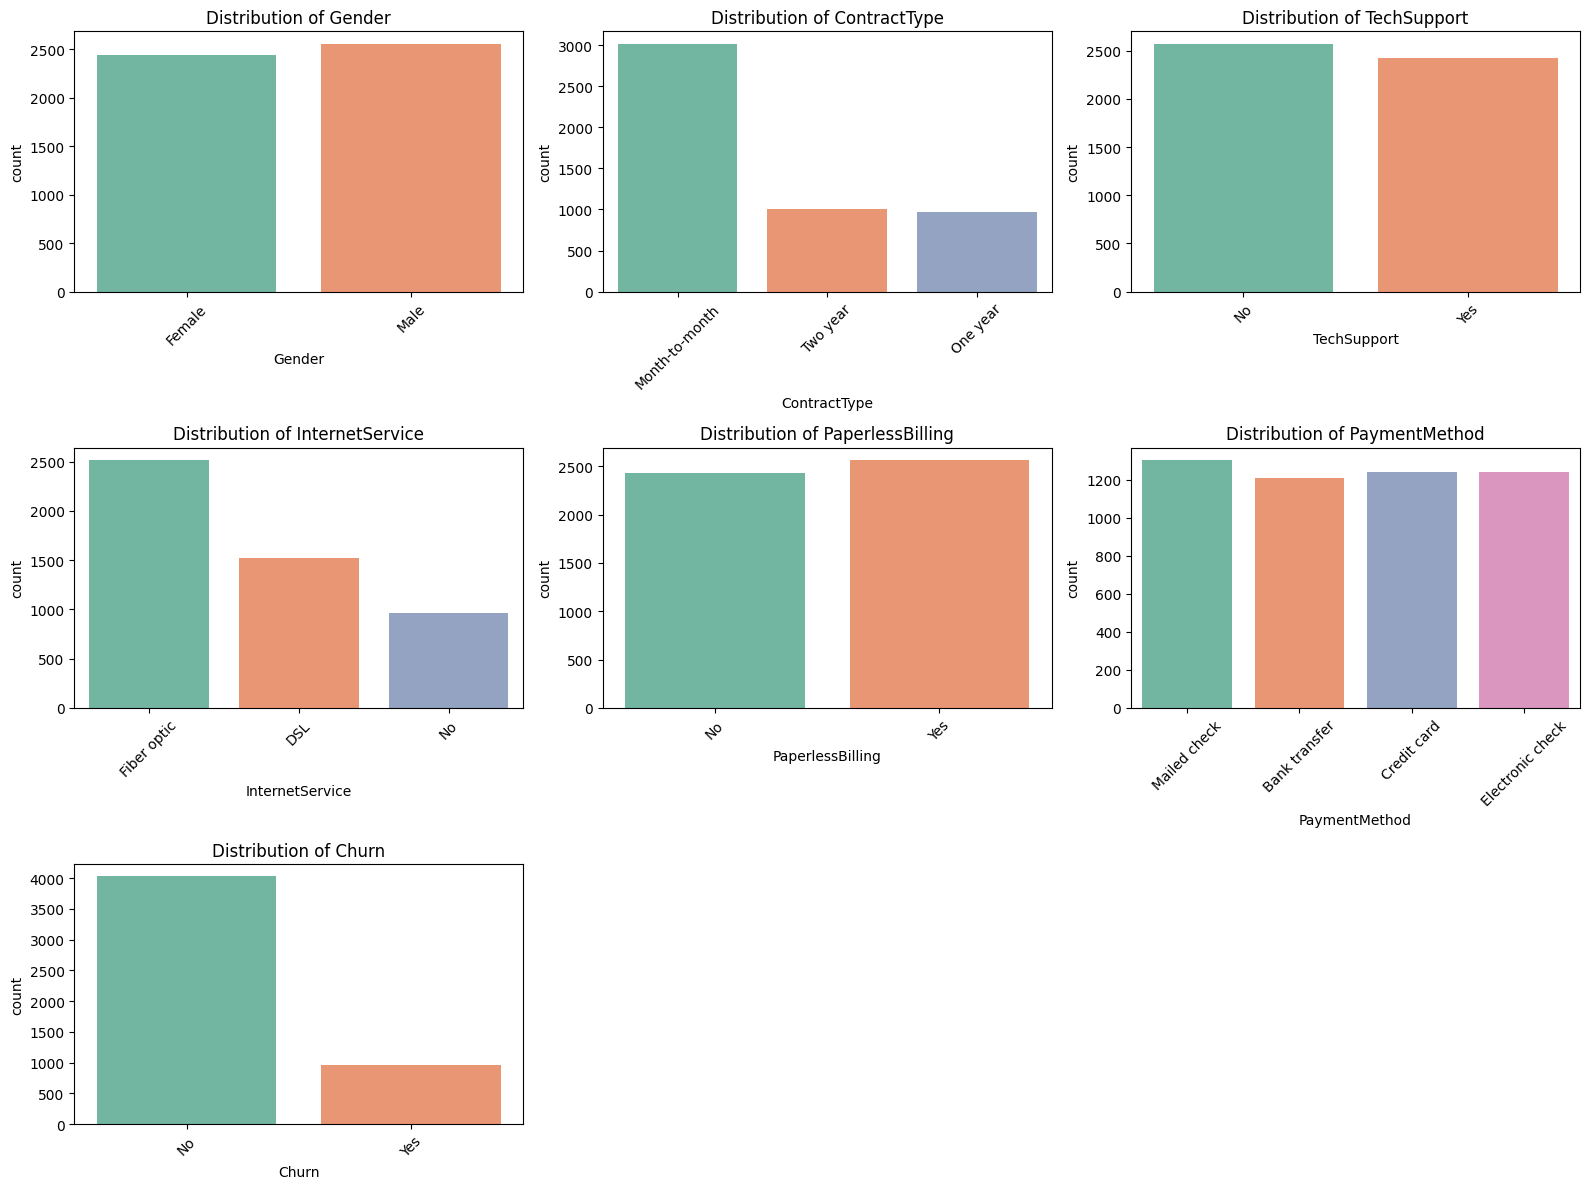

In [7]:
# Function to plot categorical data distributions
def categorical_distributions(df, columns):
    plt.figure(figsize=(16, 12))
    for i, col in enumerate(columns, 1):
        plt.subplot(3, 3, i)
        sns.countplot(data=df, x=col, palette='Set2')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

categorical_columns = ['Gender', 'ContractType', 'TechSupport', 'InternetService', 'PaperlessBilling', 'PaymentMethod', 'Churn']

categorical_distributions(df, categorical_columns)


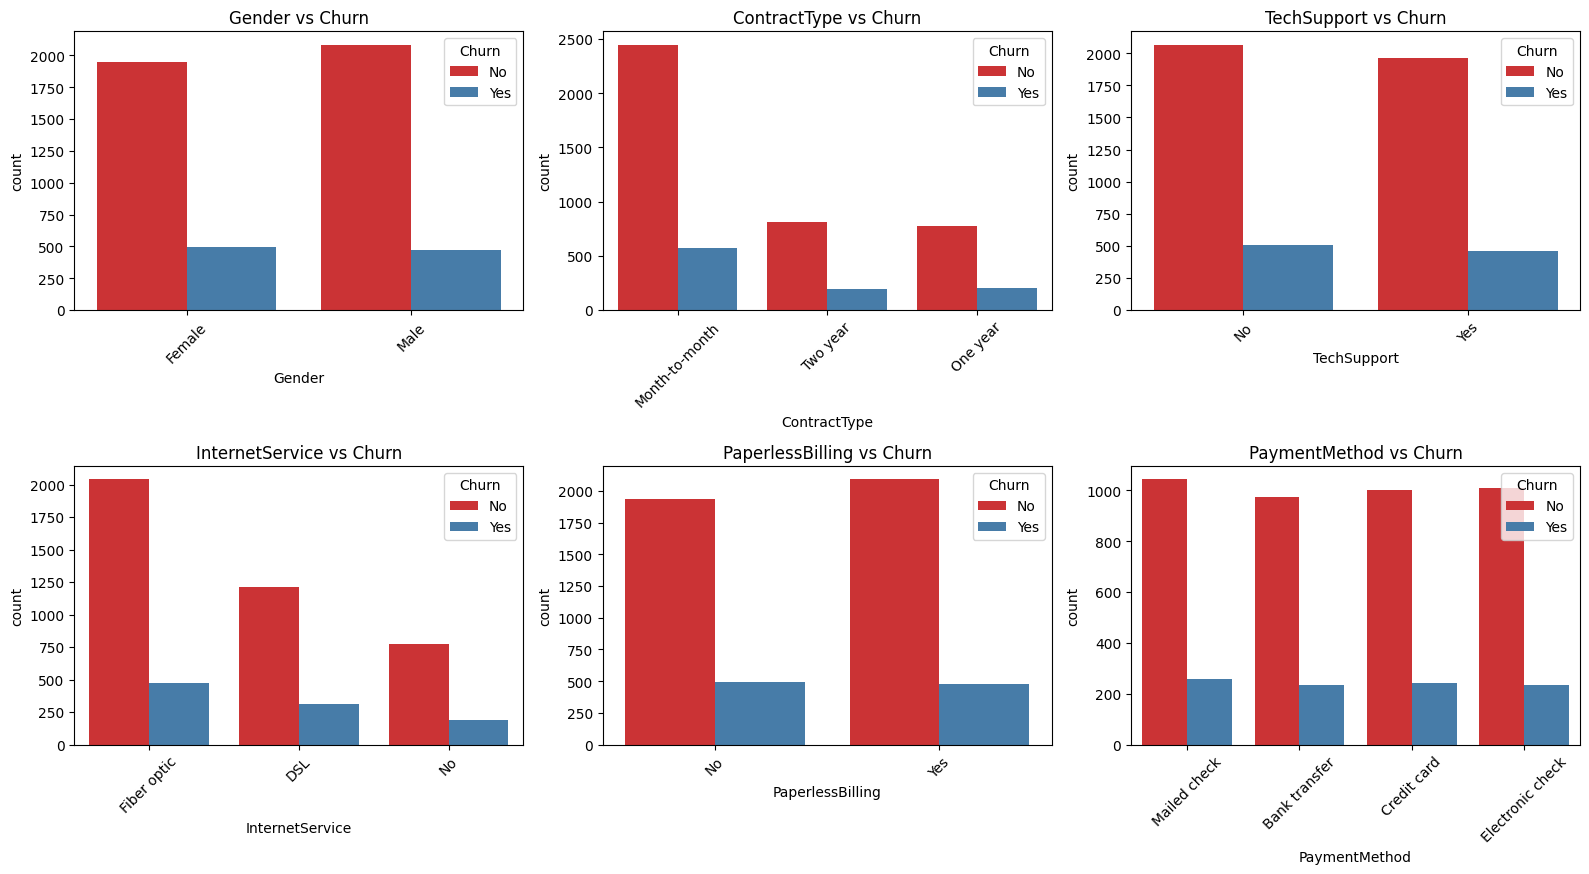

In [8]:
# Visualize the relationship between categorical features and churn
def plot_churn_relationships(df, columns, target):
    plt.figure(figsize=(16, 12))
    for i, col in enumerate(columns, 1):
        plt.subplot(3, 3, i)
        sns.countplot(data=df, x=col, hue=target, palette='Set1')
        plt.title(f'{col} vs {target}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_churn_relationships(df, categorical_columns[:-1], 'Churn')


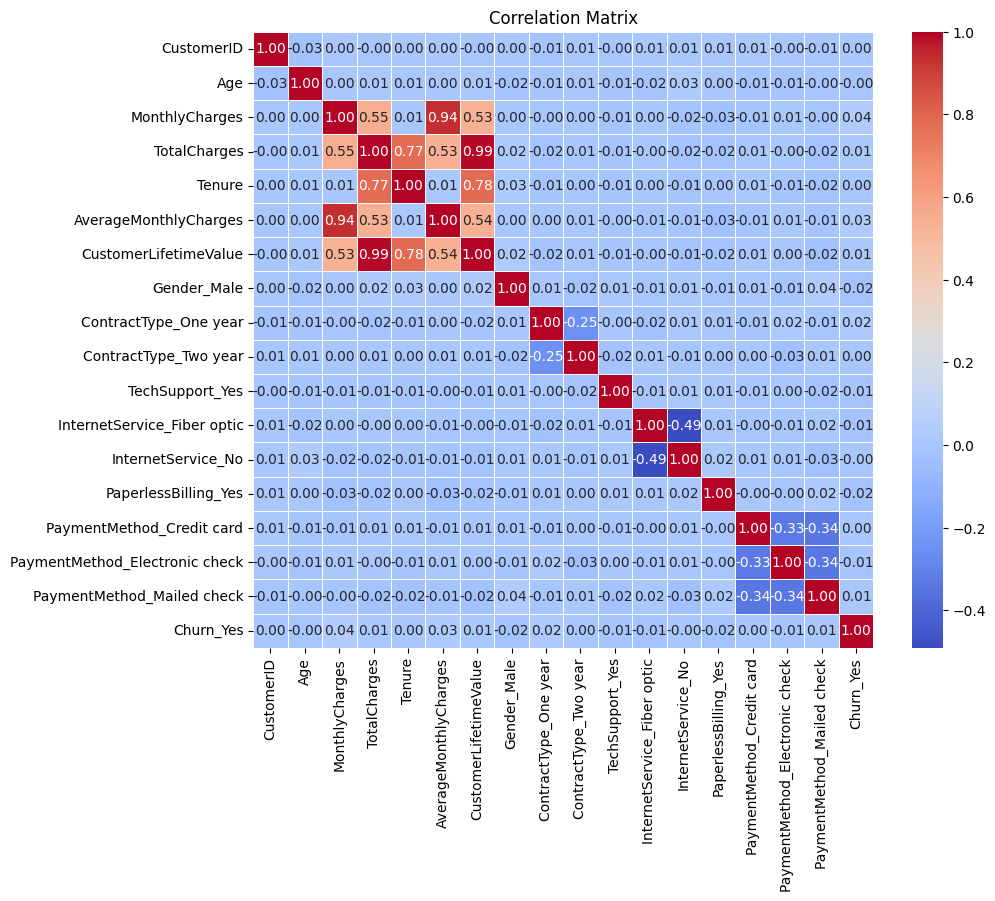

Correlation with Churn:
Churn_Yes                         1.000000
MonthlyCharges                    0.035169
AverageMonthlyCharges             0.031017
ContractType_One year             0.016912
TotalCharges                      0.014203
CustomerLifetimeValue             0.010492
PaymentMethod_Mailed check        0.008091
ContractType_Two year             0.001825
Tenure                            0.000886
PaymentMethod_Credit card         0.000061
CustomerID                        0.000061
InternetService_No               -0.000308
Age                              -0.004854
TechSupport_Yes                  -0.007736
PaymentMethod_Electronic check   -0.009528
InternetService_Fiber optic      -0.014071
Gender_Male                      -0.021700
PaperlessBilling_Yes             -0.024088
Name: Churn_Yes, dtype: float64


In [9]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Focus on correlation with Churn
print("Correlation with Churn:")
print(correlation_matrix['Churn_Yes'].sort_values(ascending=False))


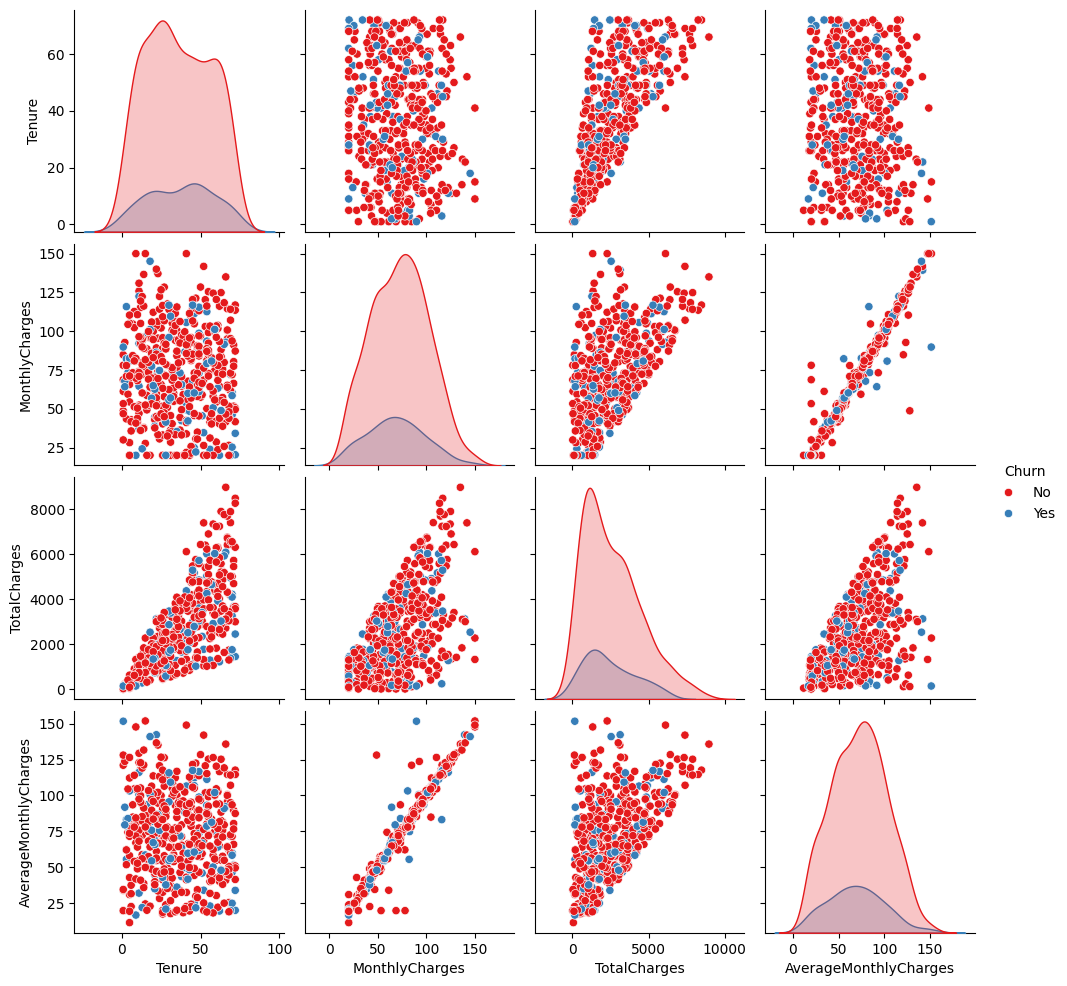

In [10]:
# Sample the data to make the pairplot manageable
sample_data = df.sample(500, random_state=42)
# Plot pairplot for selected features
sns.pairplot(sample_data[['Tenure', 'MonthlyCharges', 'TotalCharges', 'AverageMonthlyCharges', 'Churn']],
             hue='Churn', palette='Set1')
plt.show()
